# EDA to explore how people access restaurants and potential use cases for recommender system  
</br>
data sources: </br>
- PSRC Household Travel Survey trips & household dataset </br>
- 2022 TIGER lines of Washington tracts (documentation: https://www2.census.gov/geo/pdfs/maps-data/data/tiger/tgrshp2019/TGRSHP2019_TechDoc.pdf)</br>
note:  </br>
- weights must be applied when looking at trip characteristics </br>
- this analysis uses 2017, 2019, and 2021 data </br>
= PSRC domain: King, Pierce, Snohomish and Kitsap counties

In [1]:
from jupyterthemes import jtplot
jtplot.style(theme="onedork")

In [2]:
# !pip install geopandas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
from matplotlib import dates
import geopandas as gpd
import seaborn as sns
from scipy import stats

In [4]:
# 2017, 2019, 2021 data
trips_df = pd.read_csv("Household_Travel_Survey_Trips.csv")
hh_df = pd.read_csv("Household_Travel_Survey_Households.csv")

/var/folders/mg/5x982c514sl0dc5v1pd9gj580000gn/T/ipykernel_3704/3672231476.py:2: DtypeWarning: Columns (5,8,25,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,52,68,69,73,75,76,86,87,88,89,90,91,92,93,94,95,96,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,130,131,132,133,134,135,136,137,138,139,140,142,154) have mixed types. Specify dtype option on import or set low_memory=False.
  trips_df = pd.read_csv("Household_Travel_Survey_Trips.csv")


In [5]:
# 2017, 2019 data
# use hh_wt_revised (since this dataset is only needed to look at activity durations, and this
# value is only present for 2017 trips)
trips_1719 = pd.read_csv("/Users/kaitlynng/Desktop/UW/cet512/HW2/File1-File5 Archive/2017_2019_PSRC_SURVEY.csv")

/var/folders/mg/5x982c514sl0dc5v1pd9gj580000gn/T/ipykernel_3704/674001948.py:2: DtypeWarning: Columns (1,24,25,38,40,41,42,43,44,51,55,57,58,60,68,69,70,90,94,125,126,148,149,162,168,169,170,171,172,173,174,175,176,177,178,179,180,181,184,192,193,194,195,196,197,198) have mixed types. Specify dtype option on import or set low_memory=False.
  trips_1719 = pd.read_csv("/Users/kaitlynng/Desktop/UW/cet512/HW2/File1-File5 Archive/2017_2019_PSRC_SURVEY.csv")


In [9]:
trips_1719.head()
restaurant_1719 = trips_1719[(trips_1719["origin_purpose"]=="Went to restaurant to eat/get take-out")
                            | (trips_1719["dest_purpose"]=="Went to restaurant to eat/get take-out")]
restaurant_1719.head()

,trip_id,recid,hhid,personid,survey_year_x,pernum,tripnum,tottrip1,tottrip2,daynum_x,...,hh_wt_revised,hh_day_wt_revised_y,initial_expansion_factor_combined,hh_wt_combined,initial_expansion_factor_2019,hh_wt_2019,hh_day_wt_combined_y,hh_day_wt_2019_y,date_extracted_y,daynum_y
25,1710005201004,D00026,17100052,1710005201,2017,1,4,5.0,5.0,1,...,25.692826,25.692826,47.543561,49.286868,0.0,0.0,49.286868,0.0,9/24/2020 1:53:42 PM,1
26,1710005201005,D00027,17100052,1710005201,2017,1,5,5.0,5.0,1,...,25.692826,25.692826,47.543561,49.286868,0.0,0.0,49.286868,0.0,9/24/2020 1:53:42 PM,1
34,1710005901008,D18220,17100059,1710005901,2017,1,8,33.0,4.0,3,...,47.768728,15.922909,86.469251,132.808752,0.0,0.0,44.269584,0.0,9/24/2020 1:53:42 PM,7
35,1710005901009,D18221,17100059,1710005901,2017,1,9,33.0,4.0,3,...,47.768728,15.922909,86.469251,132.808752,0.0,0.0,44.269584,0.0,9/24/2020 1:53:42 PM,7
39,1710005901013,D18227,17100059,1710005901,2017,1,13,33.0,15.0,4,...,47.768728,15.922909,86.469251,132.808752,0.0,0.0,44.269584,0.0,9/24/2020 1:53:42 PM,7


In [6]:
# add weights here
# create a list of our conditions
conditions = [
    (trips_df['survey_year'] == 2017),
    (trips_df['survey_year'] == 2019),
    (trips_df['survey_year'] == 2021),
    ]

# create a list of the values we want to assign for each condition
values = [trips_df['trip_weight_2017_v2021'], trips_df['trip_weight_2019_v2021'], 1]

# create a new column and use np.select to assign values to it using our lists as arguments
trips_df['weights'] = np.select(conditions, values)

In [7]:
for col in trips_df.columns:
    print(col)

household_id
person_dim_id
trip_id
hhid
survey_year
sample_source
seattle_home
hh_race_category
hhgroup
sample_county
final_home_puma10
final_home_uvnum
hhsize
vehicle_count
lifecycle
hhincome_broad
hhincome_detailed
car_share
rent_own
res_dur
res_type
prev_home_wa
res_factors_30min
res_factors_afford
res_factors_closefam
res_factors_hhchange
res_factors_hwy
res_factors_school
res_factors_space
res_factors_transit
res_factors_walk
prev_res_factors_housing_cost
prev_res_factors_income_change
prev_res_factors_community_chan
prev_res_factors_hh_size
prev_res_factors_more_space
prev_res_factors_less_space
prev_res_factors_employment
prev_res_factors_school
prev_res_factors_crime
prev_res_factors_quality
prev_res_factors_forced
prev_res_factors_no_answer
prev_res_factors_other
prev_res_factors_specify
prev_res_factors_covid_flexibil
prev_res_factors_covid_health
broadband
numadults
numchildren
numworkers
offpark_cost
cityofseattle
age
age_category
gender
employment
jobs_count
student
school

In [8]:
# trips_df["origin_purpose"].value_counts()
trips_df.groupby("dest_purpose").sum()["weights"].sort_values(ascending=False)

dest_purpose
Went home                                                                            1.093844e+07
Went to primary workplace                                                            3.746572e+06
Went grocery shopping                                                                2.518404e+06
Dropped off/picked up someone (e.g., son at a friend's house, spouse at bus stop)    2.354377e+06
Went to restaurant to eat/get take-out                                               1.946422e+06
Went to other shopping (e.g., mall, pet store)                                       1.865722e+06
Conducted personal business (e.g., bank, post office)                                1.674473e+06
Went to exercise (e.g., gym, walk, jog, bike ride)                                   1.441468e+06
Went to work-related place (e.g., meeting, second job, delivery)                     1.365981e+06
Went to school/daycare (e.g., daycare, K-12, college)                                1.285398e+06
Other p

food related trip purposes:
* Went to restaurant to eat/get take-out
* Went grocery shopping

In [9]:
restaurant_trips = trips_df[(trips_df["origin_purpose"]=="Went to restaurant to eat/get take-out")
                            | (trips_df["dest_purpose"]=="Went to restaurant to eat/get take-out")]


In [10]:
restaurant_trips

,household_id,person_dim_id,trip_id,hhid,survey_year,sample_source,seattle_home,hh_race_category,hhgroup,sample_county,...,depart_time_string,arrival_time_string,trip_weight_2021_ABS_Panel_adul,trip_weight_2021_ABS_Panel_resp,trip_weight_2017_v2021,trip_weight_2019_v2021,trip_weight_2017_2019_v2021,trip_weight_2017_2019_v2021_adu,ObjectId,weights
0,21200609,2120060902,2120060902001,21200609,2021,ABS,Home in Seattle,White Only,NaN,King,...,Date: 2021-04-13 20:30:00.0000000,Date: 2021-04-13 20:35:00.0000000,665.450454,0.000000,NaN,NaN,NaN,NaN,1,1.000000
1,21200609,2120060902,2120060902002,21200609,2021,ABS,Home in Seattle,White Only,NaN,King,...,Date: 2021-04-13 20:40:00.0000000,Date: 2021-04-13 20:45:00.0000000,665.450454,0.000000,NaN,NaN,NaN,NaN,2,1.000000
14,21200777,2120077701,2120077701001,21200777,2021,ABS,Home not in Seattle,White Only,NaN,King,...,Date: 2021-05-11 09:30:00.0000000,Date: 2021-05-11 09:40:00.0000000,209.424227,495.359907,NaN,NaN,NaN,NaN,15,1.000000
15,21200777,2120077701,2120077701002,21200777,2021,ABS,Home not in Seattle,White Only,NaN,King,...,Date: 2021-05-11 09:50:00.0000000,Date: 2021-05-11 09:55:00.0000000,265.984055,629.143239,NaN,NaN,NaN,NaN,16,1.000000
49,21201077,2120107702,2120107702004,21201077,2021,ABS,Home not in Seattle,White Only,NaN,King,...,Date: 2021-05-27 16:45:00.0000000,Date: 2021-05-27 17:00:00.0000000,2345.117421,0.000000,NaN,NaN,NaN,NaN,50,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136040,192018425,19201842501,19201842501014,192018425,2019,NaN,Home not in Seattle,White Only,rMove,Snohomish,...,Date: 2019-06-01 13:52:00.0000000,Date: 2019-06-01 14:10:00.0000000,NaN,NaN,NaN,0.000000,0.000000,0.000000,136041,0.000000
136045,192018425,19201842502,19201842502003,192018425,2019,NaN,Home not in Seattle,White Only,rMove,Snohomish,...,Date: 2019-05-28 18:46:00.0000000,Date: 2019-05-28 18:54:00.0000000,NaN,NaN,NaN,12.224092,6.112046,6.112046,136046,12.224092
136046,192018425,19201842502,19201842502004,192018425,2019,NaN,Home not in Seattle,White Only,rMove,Snohomish,...,Date: 2019-05-28 19:05:00.0000000,Date: 2019-05-28 19:08:00.0000000,NaN,NaN,NaN,12.224092,6.112046,6.112046,136047,12.224092
136060,192018425,19201842502,19201842502018,192018425,2019,NaN,Home not in Seattle,White Only,rMove,Snohomish,...,Date: 2019-06-01 09:34:00.0000000,Date: 2019-06-01 09:42:00.0000000,NaN,NaN,NaN,0.000000,0.000000,0.000000,136061,0.000000


In [11]:
print(restaurant_trips["daynum"].value_counts())
print(restaurant_trips.groupby("daynum").sum()["weights"])
print(restaurant_trips.groupby("main_mode").sum()["weights"].sort_values(ascending=False))

1    6653
5    3293
4    2945
6    2624
3    2332
2    1951
7    1771
Name: daynum, dtype: int64
daynum
1    3.033128e+06
2    2.886956e+05
3    2.591078e+05
4    0.000000e+00
5    0.000000e+00
6    0.000000e+00
7    2.277381e+05
Name: weights, dtype: float64
main_mode
HOV        1.753644e+06
SOV        1.335848e+06
Walk       6.210522e+05
Transit    6.927918e+04
Other      1.825722e+04
Bike       7.194707e+03
Name: weights, dtype: float64


In [12]:
restaurant_trips["origin_purpose"].value_counts()

Went to restaurant to eat/get take-out                                               11244
Went home                                                                             3946
Went to primary workplace                                                             1854
Attended social event (e.g., visit with friends, family, co-workers)                   500
Dropped off/picked up someone (e.g., son at a friend's house, spouse at bus stop)      480
Went to other shopping (e.g., mall, pet store)                                         475
Went to exercise (e.g., gym, walk, jog, bike ride)                                     411
Other purpose                                                                          381
Attended recreational event (e.g., movies, sporting event)                             351
Went to work-related place (e.g., meeting, second job, delivery)                       302
Conducted personal business (e.g., bank, post office)                                  301

# TRIP CHARACTERISTICS ANALYSIS

### Travel time

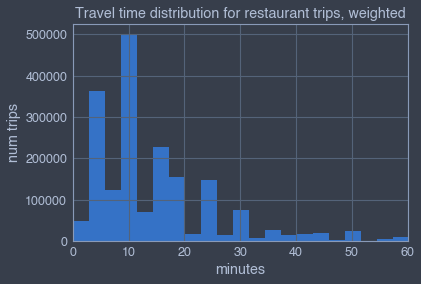

In [13]:
# travel time
plt.hist(restaurant_trips['travel_time'], bins=1000, weights=restaurant_trips["weights"])
plt.xlim(0, 60)
plt.title("Travel time distribution for restaurant trips, weighted")
plt.xlabel("minutes")
plt.ylabel("num trips")
plt.show()

In [14]:
restaurant_trips["travel_time"].median()

10.0

### Time of day

In [15]:
# time of day
restaurant_trips["depart_time_string"].iloc[0].split()[-1]
restaurant_trips["depart_time"] = restaurant_trips.apply(lambda row: row["depart_time_string"].split()[-1], axis=1)
restaurant_trips["depart_time"] = pd.to_datetime(restaurant_trips["depart_time"])

/var/folders/mg/5x982c514sl0dc5v1pd9gj580000gn/T/ipykernel_1781/3620544820.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  restaurant_trips["depart_time"] = restaurant_trips.apply(lambda row: row["depart_time_string"].split()[-1], axis=1)
/var/folders/mg/5x982c514sl0dc5v1pd9gj580000gn/T/ipykernel_1781/3620544820.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  restaurant_trips["depart_time"] = pd.to_datetime(restaurant_trips["depart_time"])


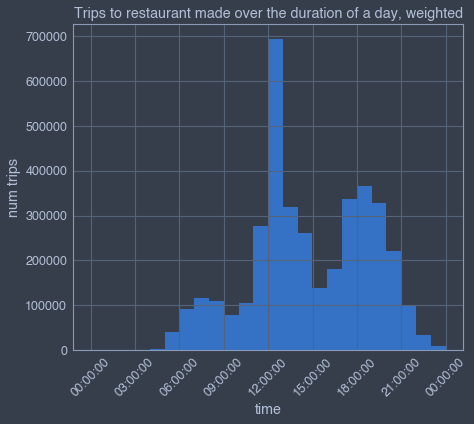

In [16]:
fig, ax = plt.subplots()
# plt.scatter(restaurant_trips["depart_time"],restaurant_trips["weights"], marker='.', color='yellow')
plt.hist(restaurant_trips["depart_time"], bins=24, weights=restaurant_trips["weights"])
plt.xticks(rotation=45)
# plt.legend()
plt.title("Trips to restaurant made over the duration of a day, weighted")
ax.xaxis.set_major_formatter(dates.DateFormatter("%H:%M:%S"))
fig.set_size_inches(7,6)
plt.ylabel("num trips")
plt.xlabel("time")
plt.show()

### Day of week

#### ***this one is not working*

(array([3033128.05904441,  288695.56353809,       0.        ,
         259107.84347992,       0.        ,       0.        ,
              0.        ,       0.        ,       0.        ,
         227738.10196667]),
 array([1. , 1.6, 2.2, 2.8, 3.4, 4. , 4.6, 5.2, 5.8, 6.4, 7. ]),
 <BarContainer object of 10 artists>)

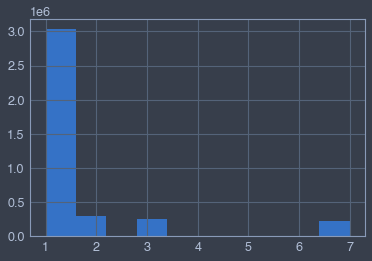

In [17]:
# plt.hist(restaurant_trips["daynum"])
######## issues with weighted trips and weight ==0 for middle of week? #############
plt.hist(restaurant_trips["daynum"], weights=restaurant_trips["weights"])

/var/folders/mg/5x982c514sl0dc5v1pd9gj580000gn/T/ipykernel_1781/149880034.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  restaurant_trips["dummy"] = 1


<BarContainer object of 7 artists>

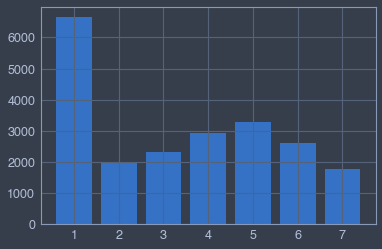

In [18]:
# restaurant_trips["daynum"].value_counts()
restaurant_trips["dummy"] = 1
temp_df = restaurant_trips.groupby("daynum").sum()
temp_df = temp_df.reset_index()
plt.bar(temp_df["daynum"], temp_df["dummy"])

### Trip trajectories/chaining
#### from XX --> restaurants
#### from restaurants --> XX

In [19]:
restaurant_origin = trips_df[(trips_df["origin_purpose"]=="Went to restaurant to eat/get take-out")]
restaurant_dest = trips_df[(trips_df["dest_purpose"]=="Went to restaurant to eat/get take-out")]

restaurant_origin = restaurant_origin.groupby("dest_purpose").sum()["weights"].sort_values(ascending=False).reset_index()
restaurant_dest = restaurant_dest.groupby("origin_purpose").sum()["weights"].sort_values(ascending=False).reset_index()

restaurant_origin.rename(columns={"weights":"dest trips"}, inplace=True)
restaurant_dest.rename(columns={"weights":"origin trips"}, inplace=True)

restaurant_origin.set_index("dest_purpose", inplace=True)
restaurant_dest.set_index("origin_purpose",inplace=True)
restaurant_od = restaurant_dest.join(restaurant_origin)
restaurant_od.index.names = ["purpose"]
restaurant_od[:10]

restaurant_od.rename(index={"Went home": "home", "Went grocery shopping":"groceries", 
                      "Went to other shopping (e.g., mall, pet store)":"other shopping",
                     "Went to restaurant to eat/get take-out":"eat out", 
                   "Attended social event (e.g., visit with friends, family, co-workers)":"social event",
                   "Conducted personal business (e.g., bank, post office)":"personal business",
                     "Went to primary workplace":"work", 
                      "Dropped off/picked up someone (e.g., son at a friend's house, spouse at bus stop)":"drop off/pick up",
                     "Other purpose":"other", "Went to exercise (e.g., gym, walk, jog, bike ride)":"exercise",
                     "Other appointment/errands (rMove only)":"other errands",
                     "Attended recreational event (e.g., movies, sporting event)":"recreational events",
                     "Went to medical appointment (e.g., doctor, dentist)":"medical appointment",
                     "Went to work-related place (e.g., meeting, second job, delivery)":"work-related place",
                     "Went to a family activity (e.g., child's softball game)":"family activity"},
               inplace = True)
restaurant_od[:10]

,origin trips,dest trips
purpose,,
home,655143.187764,697063.961790
work,459320.074736,327299.268569
drop off/pick up,111256.831563,70571.489976
eat out,99638.833423,99638.833423
personal business,90134.510954,83032.703431
other,82768.338472,126178.889410
other shopping,79999.315254,116179.899939
groceries,74033.065794,182687.294040
work-related place,63219.063468,66155.807810


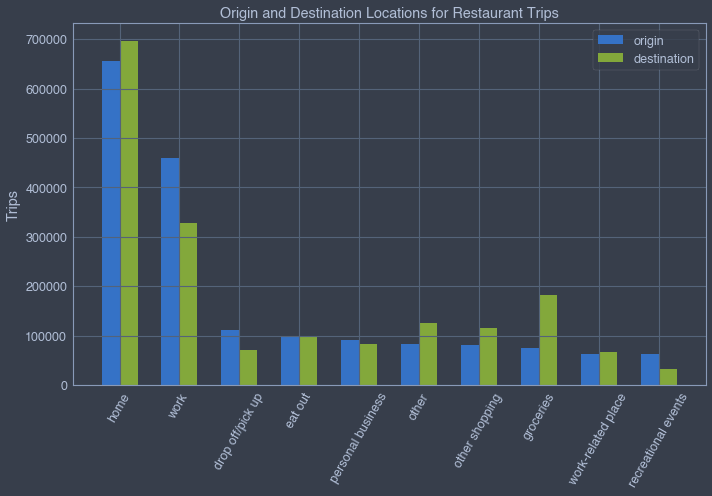

In [20]:
data = restaurant_od.iloc[:10]

x = np.arange(len(data.index))  # the label locations
width = 0.3  # the width of the bars

fig, ax = plt.subplots(figsize=(10,7))
rects1 = ax.bar(x - width/2, data["origin trips"], width, label='origin')
rects2 = ax.bar(x + width/2, data["dest trips"], width, label='destination')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Trips')
ax.set_title('Origin and Destination Locations for Restaurant Trips')
ax.set_xticks(x, data.index)
ax.set_xticklabels(data.index, rotation = 60)
ax.legend()

# ax.bar_label(rects1, padding=3)
# ax.bar_label(rects2, padding=3)

fig.tight_layout()
plt.show()

### How far is food source from a person's home?
King, Pierce, Snohomish and Kitsap counties. associated FIPS: [53033, 53053, 53061, 53035]

using PSRC data directly: 2010 census tracts https://psrc-psregcncl.hub.arcgis.com/datasets/PSREGCNCL::census-tracts-2010/explore?location=47.507099%2C-121.980146%2C9.20 </br>

`rest_to_home` column in df has information on the miles between the census tract of the individual's home and the census tract the restaurant is located in.

In [21]:
# wa_tracts = gpd.read_file("tl_2022_53_tract/tl_2022_53_tract.shp")
# psrc_tracts = wa_tracts[wa_tracts["COUNTYFP"].isin(['033', '053', '061', '035'])]
psrc_tracts = pd.read_csv("Census_Tracts_2010.csv")
psrc_tracts

,OBJECTID,ElmerGeo_DBO_tract2010_nowater_,statefp10,countyfp10,county_name,tractce10,geoid10,geoid_nm,name10,namelsad10,...,aland10,awater10,intptlat10,intptlon10,xcoord,ycoord,land_acres,total_pop10,Shape__Area,Shape__Length
0,1,1,53,33,King,22006,53033022006,53033022006,220.06,Census Tract 220.06,...,1408907,0,47.704339,-122.199267,-122.199267,47.704339,348.126961,3686,1.516435e+07,21339.070654
1,2,2,53,33,King,32320,53033032320,53033032320,323.20,Census Tract 323.20,...,9554873,38494,47.756477,-122.124445,-122.124332,47.755001,2370.392798,4205,1.032539e+08,56067.311495
2,3,3,53,33,King,31703,53033031703,53033031703,317.03,Census Tract 317.03,...,7139218,643846,47.371689,-122.148431,-122.149193,47.371877,1923.339273,6649,8.378032e+07,40256.715445
3,4,4,53,33,King,31206,53033031206,53033031206,312.06,Census Tract 312.06,...,3668962,60430,47.313562,-122.183538,-122.184001,47.312176,921.626797,4877,4.014590e+07,35779.341577
4,5,5,53,33,King,32102,53033032102,53033032102,321.02,Census Tract 321.02,...,79040166,84391,47.485151,-121.965784,-121.967130,47.491164,19552.174328,4546,8.516893e+08,130722.571262
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
768,769,769,53,61,Snohomish,52112,53061052112,53061052112,521.12,Census Tract 521.12,...,14764507,0,47.801476,-122.071577,-122.071577,47.801477,3648.079003,2607,1.589097e+08,65959.800181
769,770,770,53,61,Snohomish,52113,53061052113,53061052113,521.13,Census Tract 521.13,...,22203613,198741,47.792685,-122.021217,-122.020593,47.794501,5535.278983,3006,2.411158e+08,82480.916577
770,771,771,53,61,Snohomish,52402,53061052402,53061052402,524.02,Census Tract 524.02,...,2427219,42352,47.915061,-122.089521,-122.089054,47.914650,610.181109,3939,2.657938e+07,25481.765503
771,772,772,53,61,Snohomish,52805,53061052805,53061052805,528.05,Census Tract 528.05,...,4488199,0,48.085920,-122.174538,-122.174538,48.085920,1108.931420,4332,4.830486e+07,37257.284137


In [22]:
# join home tract to trip info
hh_tract = hh_df[["hhid", "final_home_tract10"]]
trips_tract = pd.merge(restaurant_trips, hh_tract, on="hhid", how="left")

i=0

# fill in lat/lon info for home and restaurant tract
for index, row in trips_tract.iterrows():
    # make sure tract # is in WA state, fill in home tract
    tract_id = row["final_home_tract10"]
    if len((tract_id == psrc_tracts["geoid10"]).unique()) == 2:
        trips_tract.loc[index, "home_lat"] = float(psrc_tracts[psrc_tracts["geoid10"] == tract_id]["intptlat10"].iloc[0])
        trips_tract.loc[index, "home_lon"] = float(psrc_tracts[psrc_tracts["geoid10"] == tract_id]["intptlon10"].iloc[0]) 
    # fill in restaurant tract, depending on if restaurant is origin or destination
    if row["origin_purpose"] == "Went to restaurant to eat/get take-out":
        rest_tract_id = row["o_tract10"]
    elif row["dest_purpose"] == "Went to restaurant to eat/get take-out":
        rest_tract_id = row["d_tract10"]
    if len((rest_tract_id == psrc_tracts["geoid10"]).unique()) == 2:
        # these tracts aren't located in the wa_tracts df ??????
        trips_tract.loc[index, "rest_lat"] = float(psrc_tracts[psrc_tracts["geoid10"] == rest_tract_id]["intptlat10"].iloc[0])
        trips_tract.loc[index, "rest_lon"] = float(psrc_tracts[psrc_tracts["geoid10"] == rest_tract_id]["intptlon10"].iloc[0]) 

#     if i ==100:
#         break
#     i+=1
trips_tract

,household_id,person_dim_id,trip_id,hhid,survey_year,sample_source,seattle_home,hh_race_category,hhgroup,sample_county,...,trip_weight_2017_2019_v2021_adu,ObjectId,weights,depart_time,dummy,final_home_tract10,home_lat,home_lon,rest_lat,rest_lon
0,21200609,2120060902,2120060902001,21200609,2021,ABS,Home in Seattle,White Only,NaN,King,...,NaN,1,1.000000,2023-01-23 20:30:00,1,53033005301,47.661505,-122.313122,47.661505,-122.313122
1,21200609,2120060902,2120060902002,21200609,2021,ABS,Home in Seattle,White Only,NaN,King,...,NaN,2,1.000000,2023-01-23 20:40:00,1,53033005301,47.661505,-122.313122,47.661505,-122.313122
2,21200777,2120077701,2120077701001,21200777,2021,ABS,Home not in Seattle,White Only,NaN,King,...,NaN,15,1.000000,2023-01-23 09:30:00,1,53033024800,47.574392,-122.152101,47.574392,-122.152101
3,21200777,2120077701,2120077701002,21200777,2021,ABS,Home not in Seattle,White Only,NaN,King,...,NaN,16,1.000000,2023-01-23 09:50:00,1,53033024800,47.574392,-122.152101,47.574392,-122.152101
4,21201077,2120107702,2120107702004,21201077,2021,ABS,Home not in Seattle,White Only,NaN,King,...,NaN,50,1.000000,2023-01-23 16:45:00,1,53033022902,47.640394,-122.102278,47.632720,-122.173357
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21564,192018425,19201842501,19201842501014,192018425,2019,NaN,Home not in Seattle,White Only,rMove,Snohomish,...,0.000000,136041,0.000000,2023-01-23 13:52:00,1,53061051916,47.799754,-122.229191,47.812927,-122.306599
21565,192018425,19201842502,19201842502003,192018425,2019,NaN,Home not in Seattle,White Only,rMove,Snohomish,...,6.112046,136046,12.224092,2023-01-23 18:46:00,1,53061051916,47.799754,-122.229191,47.799754,-122.229191
21566,192018425,19201842502,19201842502004,192018425,2019,NaN,Home not in Seattle,White Only,rMove,Snohomish,...,6.112046,136047,12.224092,2023-01-23 19:05:00,1,53061051916,47.799754,-122.229191,47.799754,-122.229191
21567,192018425,19201842502,19201842502018,192018425,2019,NaN,Home not in Seattle,White Only,rMove,Snohomish,...,0.000000,136061,0.000000,2023-01-23 09:34:00,1,53061051916,47.799754,-122.229191,47.783413,-122.214386


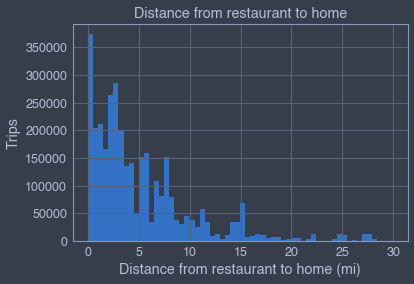

In [23]:
# run haversine to find distance from home
# lat and lon are arrays (e.g. df series)
def haversine(lat1, lon1, lat2, lon2):
    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = np.sin(dlat/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2.0)**2

    c = 2 * np.arcsin(np.sqrt(a))
    mi = 3958.756 * c
    return mi

trips_tract["rest_to_home"] = haversine(trips_tract["home_lat"], trips_tract["home_lon"], 
            trips_tract["rest_lat"], trips_tract["rest_lon"])

trips_tract_lim = trips_tract[trips_tract['rest_to_home'] <= 30]

plt.hist(trips_tract_lim["rest_to_home"], bins=60, weights=trips_tract_lim["weights"])
plt.xlabel("Distance from restaurant to home (mi)")
plt.ylabel("Trips")
plt.title("Distance from restaurant to home")
plt.show()

In [24]:
trips_tract["rest_to_home"].median()

2.1777599510081154

### Mode use

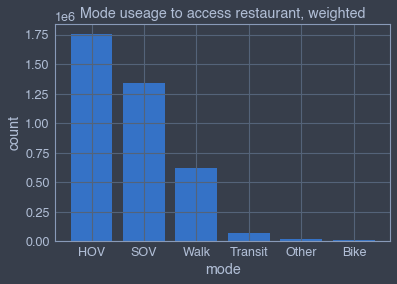

,main_mode,weights,%,cat
0,HOV,1.753644e+06,46.084552,restaurant
1,SOV,1.335848e+06,35.105162,restaurant
2,Walk,6.210522e+05,16.320818,restaurant
3,Transit,6.927918e+04,1.820609,restaurant
4,Other,1.825722e+04,0.479787,restaurant
5,Bike,7.194707e+03,0.189072,restaurant


In [25]:
mode_df = restaurant_trips.groupby("main_mode").sum()["weights"].sort_values(ascending=False)
mode_df = mode_df.reset_index()
plt.bar(mode_df["main_mode"], mode_df["weights"])
plt.title("Mode useage to access restaurant, weighted")
plt.ylabel("count")
plt.xlabel("mode")
plt.show()

mode_df["%"] = mode_df["weights"]/mode_df["weights"].sum()*100
mode_df["cat"] = "restaurant"
mode_df

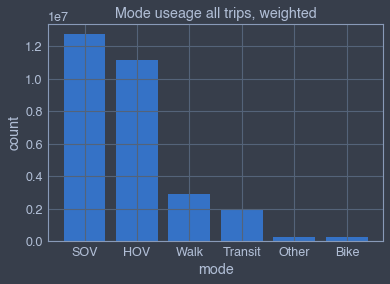

,main_mode,weights,%,cat
0,SOV,1.275886e+07,43.586705,all other trips
1,HOV,1.117961e+07,38.191686,all other trips
2,Walk,2.910821e+06,9.943918,all other trips
3,Transit,1.933672e+06,6.605791,all other trips
4,Other,2.543193e+05,0.868803,all other trips
5,Bike,2.350856e+05,0.803097,all other trips


In [26]:
# normalize data to all other trips
no_restaurants = trips_df[~trips_df.isin(restaurant_trips)].dropna(how = 'all')
mode_df_all = no_restaurants.groupby("main_mode").sum()["weights"].sort_values(ascending=False)
mode_df_all = mode_df_all.reset_index()
plt.bar(mode_df_all["main_mode"], mode_df_all["weights"])
plt.title("Mode useage all trips, weighted")
plt.ylabel("count")
plt.xlabel("mode")
plt.show()

mode_df_all["%"] = mode_df_all["weights"]/mode_df_all["weights"].sum()*100
mode_df_all["cat"] = "all other trips"
mode_df_all

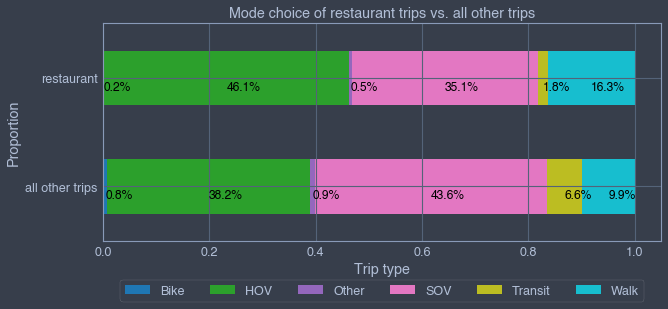

In [27]:
data = pd.concat([mode_df, mode_df_all])
cross_tab_prop = pd.crosstab(index=data["cat"], columns=data["main_mode"], values=data["weights"], 
                         aggfunc=sum, normalize="index")

cross_tab = pd.crosstab(index=data["cat"], columns=data["main_mode"])

cross_tab_prop.plot(kind='barh', 
                    stacked=True, 
                    colormap='tab10', 
                    figsize=(10, 4))

for n, x in enumerate([*cross_tab.index.values]):
    for (proportion, y_loc) in zip(cross_tab_prop.loc[x],
                                   cross_tab_prop.loc[x].cumsum()):
        plt.text(x=(y_loc - proportion) + (proportion / 2),
                 y=n - 0.11,
                 s=f'{np.round(proportion * 100, 1)}%', 
                 color="black",
                 fontsize=12,
                 fontweight="bold")

plt.legend(loc="upper center", bbox_to_anchor=(0.5, -0.15), ncol=6)
plt.xlabel("Trip type")
plt.ylabel("Proportion")
plt.title("Mode choice of restaurant trips vs. all other trips")
# ax.bar_label(f1)
plt.show()

### Time spent at restaurants

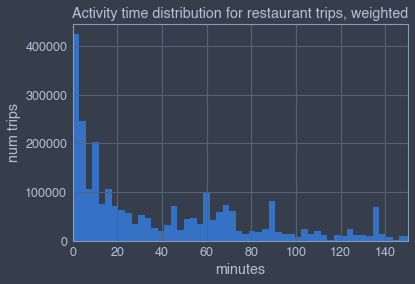

Median time spent at restaurants: 62.0 minutes


In [22]:
# activity duration
plt.hist(restaurant_1719['activity_duration'], bins=1500, weights=restaurant_1719["hh_wt_revised"])
plt.xlim(0, 150)
plt.title("Activity time distribution for restaurant trips, weighted")
plt.xlabel("minutes")
plt.ylabel("num trips")
plt.show()

print("Median time spent at restaurants: " + str(restaurant_1719['activity_duration'].median())
     + " minutes")

# DEMOGRAPHIC ANALYSIS

### vehicle ownership, income, job type, race, education, gender, age, occupation

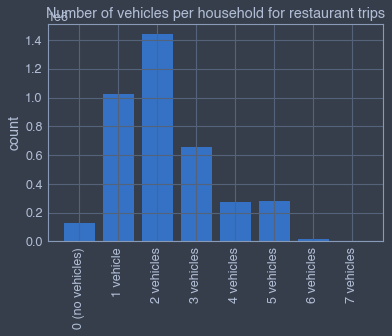

In [28]:
veh_df = restaurant_trips.groupby("vehicle_count").sum()[["weights"]]
veh_df = veh_df.rename({"weights":"count"}, axis='columns').reset_index()
plt.bar(veh_df["vehicle_count"], veh_df["count"])
plt.xticks(rotation=90)
plt.ylabel("count")
plt.title("Number of vehicles per household for restaurant trips")
plt.show()

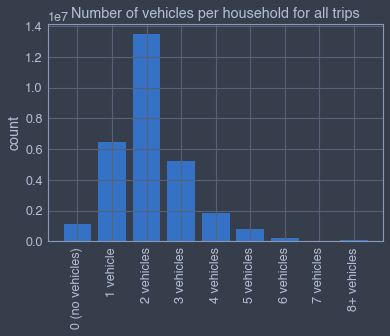

In [29]:
veh_df_all = no_restaurants.groupby("vehicle_count").sum()[["weights"]]
veh_df_all = veh_df_all.rename({"weights":"count"}, axis='columns').reset_index()
plt.bar(veh_df_all["vehicle_count"], veh_df_all["count"])
plt.xticks(rotation=90)
plt.ylabel("count")
plt.title("Number of vehicles per household for all trips")
plt.show()

In [30]:
veh_df["%"] = veh_df["count"]/veh_df["count"].sum()*100
print("hh vehicle count for restaurant trips")
print(veh_df)
print("\n")
veh_df_all["%"] = veh_df_all["count"]/veh_df_all["count"].sum()*100
print("hh vehicle count for all other trips")
print(veh_df_all)
veh_df["cat"] = "restaurant trips"
veh_df_all["cat"] = "all trips"

hh vehicle count for restaurant trips
     vehicle_count         count          %
0  0 (no vehicles)  1.249805e+05   3.281473
1        1 vehicle  1.024057e+06  26.887531
2       2 vehicles  1.438689e+06  37.774051
3       3 vehicles  6.533788e+05  17.155040
4       4 vehicles  2.719980e+05   7.141548
5       5 vehicles  2.799858e+05   7.351277
6       6 vehicles  1.537525e+04   0.403691
7       7 vehicles  2.052539e+02   0.005389


hh vehicle count for all other trips
     vehicle_count         count          %
0  0 (no vehicles)  1.124914e+06   3.837098
1        1 vehicle  6.454817e+06  22.017473
2       2 vehicles  1.347082e+07  45.949145
3       3 vehicles  5.258517e+06  17.936878
4       4 vehicles  1.831636e+06   6.247738
5       5 vehicles  8.287061e+05   2.826728
6       6 vehicles  2.150821e+05   0.733648
7       7 vehicles  3.941384e+04   0.134441
8      8+ vehicles  9.289033e+04   0.316850


Text(0.5, 1.0, 'Vehicle Ownership')

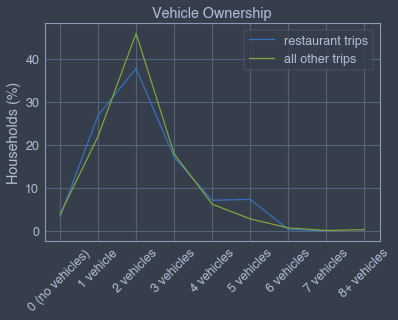

In [31]:
plt.plot(veh_df['vehicle_count'], veh_df['%'], label='restaurant trips')
plt.plot(veh_df_all['vehicle_count'], veh_df_all['%'], label='all other trips')
plt.legend()
plt.xticks(rotation=45)
plt.ylabel('Households (%)')
plt.title("Vehicle Ownership")

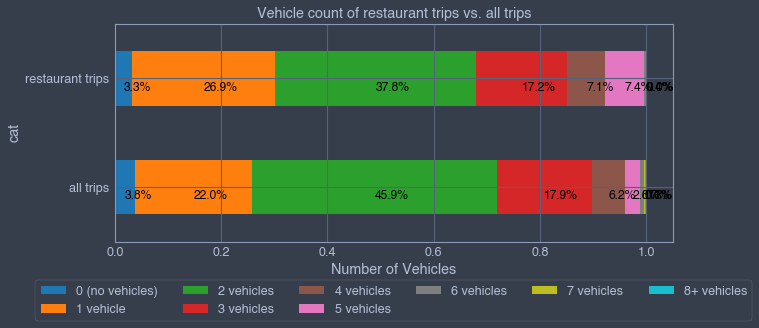

In [32]:
data1 = pd.concat([veh_df, veh_df_all])
cross_tab_prop = pd.crosstab(index=data1["cat"], columns=data1["vehicle_count"], 
                             values=data1["count"], 
                         aggfunc=sum, normalize="index")

cross_tab = pd.crosstab(index=data1["cat"], columns=data1["vehicle_count"])

cross_tab_prop.plot(kind='barh', 
                    stacked=True, 
                    colormap='tab10', 
                    figsize=(10, 4))

for n, x in enumerate([*cross_tab.index.values]):
    for (proportion, y_loc) in zip(cross_tab_prop.loc[x],
                                   cross_tab_prop.loc[x].cumsum()):
        plt.text(x=(y_loc - proportion) + (proportion / 2),
                 y=n - 0.11,
                 s=f'{np.round(proportion * 100, 1)}%', 
                 color="black",
                 fontsize=12,
                 fontweight="bold")

plt.legend(loc="upper center", bbox_to_anchor=(0.5, -0.15), ncol=6)
plt.xlabel("Number of Vehicles")
plt.title("Vehicle count of restaurant trips vs. all trips")
# ax.bar_label(f1)
plt.show()

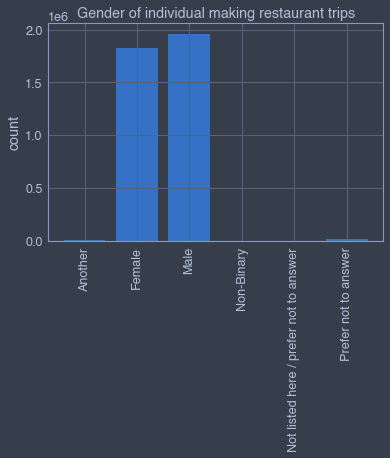

In [33]:
gender_df = restaurant_trips.groupby("gender").sum()[["weights"]]
gender_df = gender_df.rename({"weights":"count"}, axis='columns').reset_index()
gender_df["cat"] = "restaurant trips"
plt.bar(gender_df["gender"], gender_df["count"])
plt.xticks(rotation=90)
plt.ylabel("count")
plt.title("Gender of individual making restaurant trips")
plt.show()

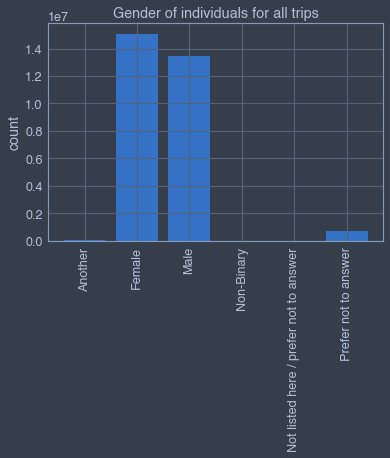

In [34]:
gender_df_all = no_restaurants.groupby("gender").sum()[["weights"]]
gender_df_all = gender_df_all.rename({"weights":"count"}, axis='columns').reset_index()
gender_df_all["cat"] = "all other trips"
plt.bar(gender_df_all["gender"], gender_df_all["count"])
plt.xticks(rotation=90)
plt.ylabel("count")
plt.title("Gender of individuals for all trips")
plt.show()

In [35]:
gender_df.drop(index=[4,5], inplace=True)
gender_df_all.drop(index=[4,5], inplace=True)

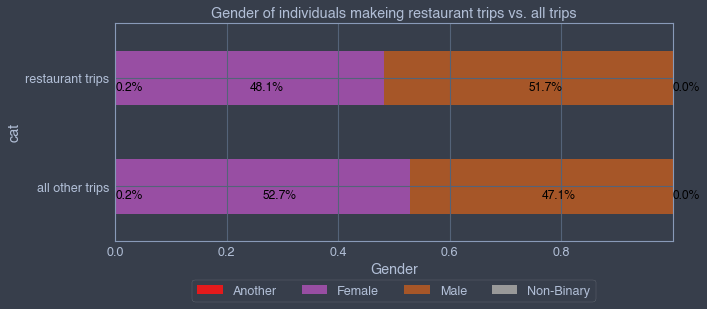

In [36]:
data2 = pd.concat([gender_df, gender_df_all])
cross_tab_prop = pd.crosstab(index=data2["cat"], columns=data2["gender"], 
                             values=data2["count"], 
                         aggfunc=sum, normalize="index")

cross_tab = pd.crosstab(index=data2["cat"], columns=data2["gender"])

cross_tab_prop.plot(kind='barh', 
                    stacked=True, 
                    colormap='Set1', 
                    figsize=(10, 4))

for n, x in enumerate([*cross_tab.index.values]):
    for (proportion, y_loc) in zip(cross_tab_prop.loc[x],
                                   cross_tab_prop.loc[x].cumsum()):
        plt.text(x=(y_loc - proportion) + (proportion / 2),
                 y=n - 0.11,
                 s=f'{np.round(proportion * 100, 1)}%', 
                 color="black",
                 fontsize=12,
                 fontweight="bold")

plt.legend(loc="upper center", bbox_to_anchor=(0.5, -0.15), ncol=6)
plt.xlabel("Gender")
plt.title("Gender of individuals makeing restaurant trips vs. all trips")
# ax.bar_label(f1)
plt.show()

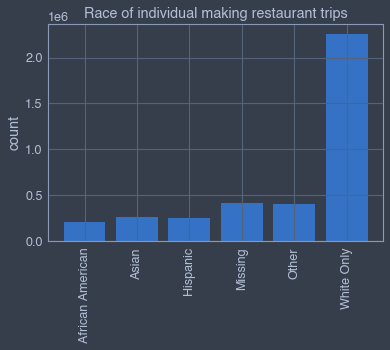

In [37]:
race_df = restaurant_trips.groupby("hh_race_category").sum()[["weights"]]
race_df = race_df.rename({"weights":"count"}, axis='columns').reset_index()
race_df["cat"] = "restaurant trips"
plt.bar(race_df["hh_race_category"], race_df["count"])
plt.xticks(rotation=90)
plt.ylabel("count")
plt.title("Race of individual making restaurant trips")
plt.show()

## normalize this plot to total percentage of race accross PSRC?

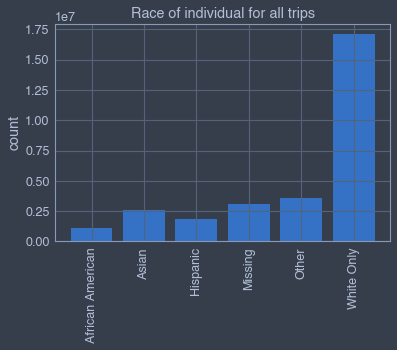

In [38]:
race_df_all = no_restaurants.groupby("hh_race_category").sum()[["weights"]]
race_df_all = race_df_all.rename({"weights":"count"}, axis='columns').reset_index()
race_df_all["cat"] = "all other trips"
plt.bar(race_df_all["hh_race_category"], race_df_all["count"])
plt.xticks(rotation=90)
plt.ylabel("count")
plt.title("Race of individual for all trips")
plt.show()

## normalize this plot to total percentage of race accross PSRC?

In [39]:
race_df.drop(index=3, inplace=True)
race_df_all.drop(index=3, inplace=True)

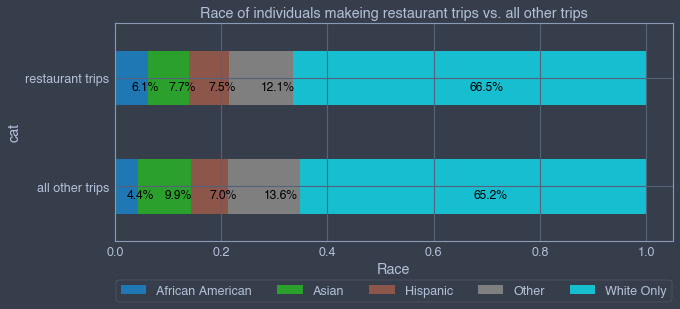

In [40]:
data3 = pd.concat([race_df, race_df_all])
cross_tab_prop = pd.crosstab(index=data3["cat"], columns=data3["hh_race_category"], 
                             values=data3["count"], 
                         aggfunc=sum, normalize="index")

cross_tab = pd.crosstab(index=data3["cat"], columns=data3["hh_race_category"])

cross_tab_prop.plot(kind='barh', 
                    stacked=True, 
                    colormap='tab10', 
                    figsize=(10, 4))

for n, x in enumerate([*cross_tab.index.values]):
    for (proportion, y_loc) in zip(cross_tab_prop.loc[x],
                                   cross_tab_prop.loc[x].cumsum()):
        plt.text(x=(y_loc - proportion) + (proportion / 2),
                 y=n - 0.11,
                 s=f'{np.round(proportion * 100, 1)}%', 
                 color="black",
                 fontsize=12,
                 fontweight="bold")

plt.legend(loc="upper center", bbox_to_anchor=(0.5, -0.15), ncol=6)
plt.xlabel("Race")
plt.title("Race of individuals makeing restaurant trips vs. all other trips")
# ax.bar_label(f1)
plt.show()

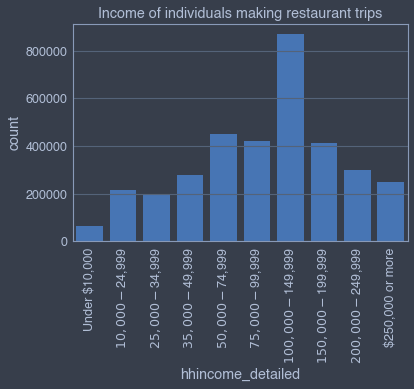

In [41]:
inc_df = restaurant_trips.groupby("hhincome_detailed").sum()[["weights"]]
inc_df = inc_df.rename({"weights":"count"}, axis='columns').reset_index()

sns.barplot(
    data=inc_df,
    x='hhincome_detailed',
    y='count',
    order=['Under $10,000','$10,000-$24,999', '$25,000-$34,999', '$35,000-$49,999', 
           '$50,000-$74,999', '$75,000-$99,999', '$100,000-$149,999', '$150,000-$199,999', 
           '$200,000-$249,999', '$250,000 or more'],  # Order of elements in the X-axis 
    color='b'
)
plt.xticks(rotation=90)
plt.title("Income of individuals making restaurant trips")
plt.show()

# plot with low-income marker
# order x-axis

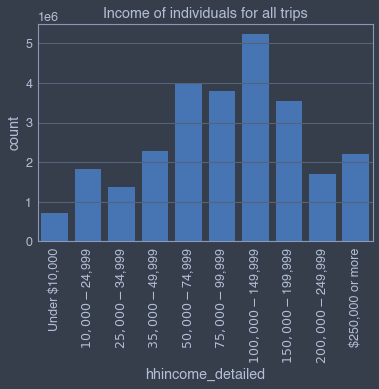

In [42]:
inc_df_all = no_restaurants.groupby("hhincome_detailed").sum()[["weights"]]
inc_df_all = inc_df_all.rename({"weights":"count"}, axis='columns').reset_index()

sns.barplot(
    data=inc_df_all,
    x='hhincome_detailed',
    y='count',
    order=['Under $10,000','$10,000-$24,999', '$25,000-$34,999', '$35,000-$49,999', 
           '$50,000-$74,999', '$75,000-$99,999', '$100,000-$149,999', '$150,000-$199,999', 
           '$200,000-$249,999', '$250,000 or more'],  # Order of elements in the X-axis 
    color='b'
)
plt.xticks(rotation=90)
plt.title("Income of individuals for all trips")
plt.show()

# plot with low-income marker
# order x-axis

In [43]:
sort_inc = ['Under $10,000', '$10,000-$24,999', '$25,000-$34,999', '$35,000-$49,999', 
                '$50,000-$74,999', '$75,000-$99,999', '$100,000-$149,999', '$150,000-$199,999', 
                '$200,000-$249,999','$250,000 or more', 'Prefer not to answer']
inc_df["%"] = inc_df["count"]/inc_df["count"].sum()*100
inc_df.set_index("hhincome_detailed", inplace=True)
inc_df = inc_df.reindex(sort_inc).reset_index()
inc_df_all["%"] = inc_df_all["count"]/inc_df_all["count"].sum()*100
inc_df_all.set_index("hhincome_detailed", inplace=True)
inc_df_all = inc_df_all.reindex(sort_inc).reset_index()

print("hh income for restaurant trips")
print(inc_df)
print()
print("hh income for all other trips")
print(inc_df_all)

hh income for restaurant trips
       hhincome_detailed          count          %
0          Under $10,000   65812.721371   1.727971
1        $10,000-$24,999  216932.509685   5.695756
2        $25,000-$34,999  193876.280911   5.090394
3        $35,000-$49,999  279753.587032   7.345179
4        $50,000-$74,999  452728.377733  11.886785
5        $75,000-$99,999  422951.172233  11.104958
6      $100,000-$149,999  869942.141540  22.841103
7      $150,000-$199,999  412470.856310  10.829788
8      $200,000-$249,999  300271.598765   7.883897
9       $250,000 or more  249713.864366   6.556459
10  Prefer not to answer  344216.458083   9.037709

hh income for all other trips
       hhincome_detailed         count          %
0          Under $10,000  7.138229e+05   2.434860
1        $10,000-$24,999  1.827159e+06   6.232465
2        $25,000-$34,999  1.369951e+06   4.672924
3        $35,000-$49,999  2.271192e+06   7.747070
4        $50,000-$74,999  4.011619e+06  13.683691
5        $75,000-$99,999  

Text(0.5, 1.0, 'Income')

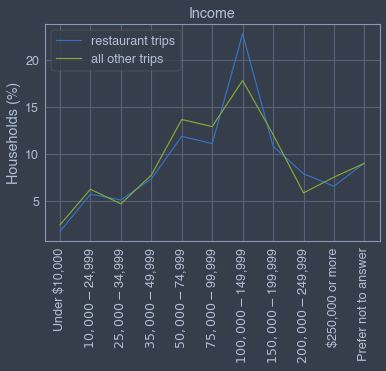

In [44]:
plt.plot(inc_df['hhincome_detailed'], inc_df['%'], label='restaurant trips')
plt.plot(inc_df_all['hhincome_detailed'], inc_df_all['%'], label='all other trips')
plt.legend()
plt.xticks(rotation=90)
plt.ylabel('Households (%)')
plt.title("Income")

In [45]:
age_order = ['Under 5 years old', '5-11 years', '12-15 years', '16-17 years', '18-24 years',
          '25-34 years', '35-44 years', '45-54 years', '55-64 years', '65-74 years',
          '75-84 years', '85 or years older']

age_df = restaurant_trips.groupby("age").sum()[["weights"]]
age_df = age_df.rename({"weights":"count"}, axis='columns')
age_df["%"] = age_df["count"]/age_df["count"].sum()*100
age_df = age_df.reindex(age_order).reset_index()

age_df_all = no_restaurants.groupby("age").sum()[["weights"]]
age_df_all = age_df_all.rename({"weights":"count"}, axis='columns')
age_df_all["%"] = age_df_all["count"]/age_df_all["count"].sum()*100
age_df_all = age_df_all.reindex(age_order).reset_index()

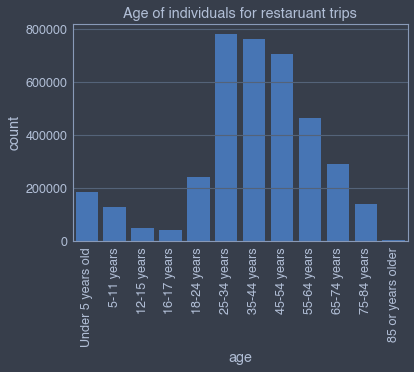

Text(0.5, 1.0, 'Age')

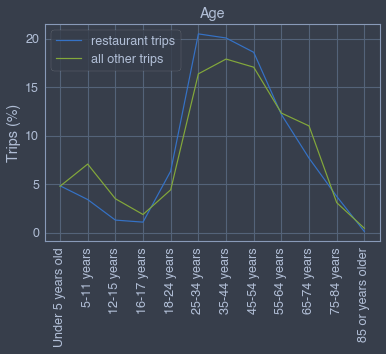

In [46]:
sns.barplot(
    data=age_df,
    x='age',
    y='count',
    order=age_order,  # Order of elements in the X-axis 
    color='b'
)
plt.xticks(rotation=90)
plt.title("Age of individuals for restaruant trips")
plt.show()

plt.plot(age_df['age'], age_df['%'], label='restaurant trips')
plt.plot(age_df_all['age'], age_df_all['%'], label='all other trips')
plt.legend()
plt.xticks(rotation=90)
plt.ylabel('Trips (%)')
plt.title("Age")

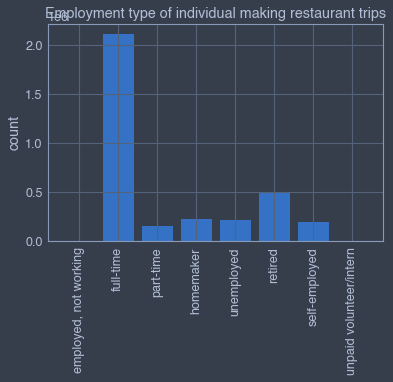

In [47]:
job_df = restaurant_trips.groupby("employment").sum()[["weights"]]
job_df = job_df.rename({"weights":"count"}, axis='columns').reset_index()
job_df = job_df.drop(4)
job_df["employment"] = ["employed, not working", "full-time", "part-time", "homemaker",
                       "unemployed", "retired", "self-employed", "unpaid volunteer/intern"]
job_df

plt.bar(job_df["employment"], job_df["count"])
plt.xticks(rotation=90)
plt.ylabel("count")
plt.title("Employment type of individual making restaurant trips")
plt.show()

In [48]:
job_df['%'] = job_df['count']/sum(job_df['count'])*100

job_df_all = no_restaurants.groupby("employment").sum()[["weights"]]
job_df_all = job_df_all.rename({"weights":"count"}, axis='columns').reset_index()
job_df_all = job_df_all.drop(4)
job_df_all["employment"] = ["employed, not working", "full-time", "part-time", "homemaker",
                       "unemployed", "retired", "self-employed", "unpaid volunteer/intern"]
job_df_all['%'] = job_df_all['count']/sum(job_df_all['count'])*100
job_df_all

,employment,count,%
0,"employed, not working",1.290000e+02,0.000532
1,full-time,1.208237e+07,49.820395
2,part-time,2.296597e+06,9.469775
3,homemaker,2.515828e+06,10.373751
5,unemployed,1.582875e+06,6.526816
6,retired,4.144386e+06,17.088936
7,self-employed,1.496634e+06,6.171210
8,unpaid volunteer/intern,1.330416e+05,0.548583


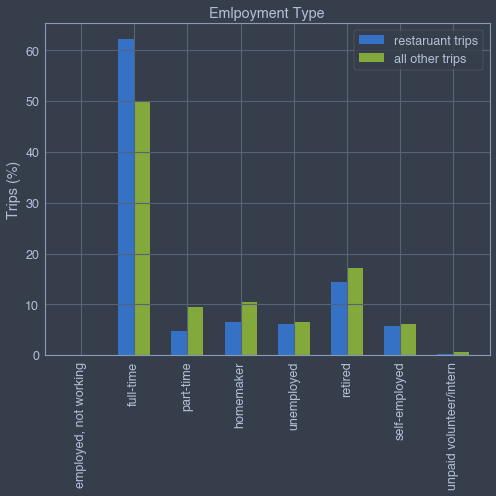

In [49]:
x = np.arange(len(job_df.index))  # the label locations
width = 0.3  # the width of the bars

fig, ax = plt.subplots(figsize=(7,7))
rects1 = ax.bar(x - width/2, job_df["%"], width, label='restaruant trips')
rects2 = ax.bar(x + width/2, job_df_all["%"], width, label='all other trips')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Trips (%)')
ax.set_title('Emlpoyment Type')
ax.set_xticks(x, job_df.index)
ax.set_xticklabels(job_df["employment"], rotation = 90)
ax.legend()

# ax.bar_label(rects1, padding=3)
# ax.bar_label(rects2, padding=3)

fig.tight_layout()
plt.show()

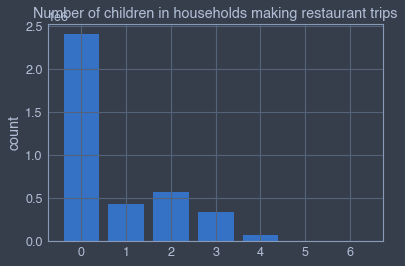

In [50]:
kid_df = restaurant_trips.groupby("numchildren").sum()[["weights"]]
kid_df = kid_df.rename({"weights":"count"}, axis='columns').reset_index()
kid_df

plt.bar(kid_df["numchildren"], kid_df["count"])
plt.ylabel("count")
plt.title("Number of children in households making restaurant trips")
plt.show()

In [51]:
kid_df['%'] = kid_df['count']/sum(kid_df['count'])*100

kid_df_all = no_restaurants.groupby("numchildren").sum()[["weights"]]
kid_df_all = kid_df_all.rename({"weights":"count"}, axis='columns').reset_index()
kid_df_all['%'] = kid_df_all['count']/sum(kid_df_all['count'])*100
kid_df_all

,numchildren,count,%
0,0.0,1.479529e+07,50.484704
1,1.0,3.756613e+06,12.818373
2,2.0,6.360829e+06,21.704517
3,3.0,2.959973e+06,10.100065
4,4.0,9.578067e+05,3.268243
5,5.0,1.697032e+05,0.579064
6,6.0,3.062631e+05,1.045036


Text(0.5, 1.0, 'Number of Children')

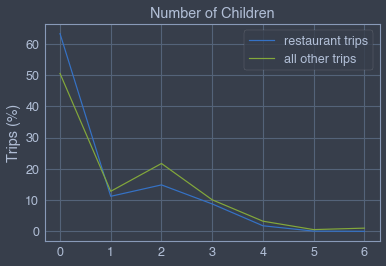

In [52]:
plt.plot(kid_df['numchildren'], kid_df['%'], label='restaurant trips')
plt.plot(kid_df_all['numchildren'], kid_df_all['%'], label='all other trips')
plt.legend()
plt.ylabel('Trips (%)')
plt.title("Number of Children")

# Statistical Tests
Use statistical tests to determine if <b>*mode, gender, tace, vehicle ownership, and income*</b> are statistically different between all trips and restaurant trips made

## Income
- convert categorical to continuous
- assume lowest income bracket when converting for conservative estimates (ex. 10,000-24,999 --> 10,000)
- except: less than 10k --> 0 and "prefer not to answer" was dropped

Null hypothesis, H0: there is no income difference in the subset of individuals recorded traveling to restaurants compared to the subset of individual's trips who were not recorded traveling to restaurants

H1: There is a difference in income distribution of individuals between restaurant trips and non-restaurant trips.

In [53]:
# ok i need to fix the above in how i manipulate the data-- leave the dataframes as-is, but just
# replace the categorical values of income with a numerical one. will probably have to use some 
# sort of filter to do that. then i can run the t-tests using stats librar

# for restaurant trips
# drop "prefer not to answer"
inc_rest = restaurant_trips[restaurant_trips["hhincome_detailed"].str.contains("Prefer not to answer")==False ]
# convert categorical income groups into numerical
conditions = [
    inc_rest['hhincome_detailed'].eq('$250,000 or more') ,
    inc_rest['hhincome_detailed'].eq('$10,000-$24,999') ,
    inc_rest['hhincome_detailed'].eq('$100,000-$149,999') ,
    inc_rest['hhincome_detailed'].eq('$150,000-$199,999') ,
    inc_rest['hhincome_detailed'].eq('$200,000-$249,999') ,
    inc_rest['hhincome_detailed'].eq('$25,000-$34,999') ,
    inc_rest['hhincome_detailed'].eq('$35,000-$49,999') ,
    inc_rest['hhincome_detailed'].eq('$50,000-$74,999') ,
    inc_rest['hhincome_detailed'].eq('$75,000-$99,999') ,
    inc_rest['hhincome_detailed'].eq('Under $10,000') 
]

choices = [250000, 10000, 100000, 150000, 200000, 25000, 35000, 50000, 75000, 0]

inc_rest['hhincome_detailed'] = np.select(conditions, choices)
inc_rest.groupby("hhincome_detailed").sum()[["weights"]]

/var/folders/mg/5x982c514sl0dc5v1pd9gj580000gn/T/ipykernel_1781/118035337.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  inc_rest['hhincome_detailed'] = np.select(conditions, choices)


,weights
hhincome_detailed,
0,65812.721371
10000,216932.509685
25000,193876.280911
35000,279753.587032
50000,452728.377733
75000,422951.172233
100000,869942.141540
150000,412470.856310
200000,300271.598765


In [54]:
# for all trips except restaurant trips
no_restaurants = trips_df[~trips_df.isin(restaurant_trips)].dropna(how = 'all')
# drop "prefer not to answer"
inc_other = no_restaurants[no_restaurants["hhincome_detailed"].str.contains("Prefer not to answer")==False ]
# convert categorical income groups into numerical
conditions = [
    inc_other['hhincome_detailed'].eq('$250,000 or more') ,
    inc_other['hhincome_detailed'].eq('$10,000-$24,999') ,
    inc_other['hhincome_detailed'].eq('$100,000-$149,999') ,
    inc_other['hhincome_detailed'].eq('$150,000-$199,999') ,
    inc_other['hhincome_detailed'].eq('$200,000-$249,999') ,
    inc_other['hhincome_detailed'].eq('$25,000-$34,999') ,
    inc_other['hhincome_detailed'].eq('$35,000-$49,999') ,
    inc_other['hhincome_detailed'].eq('$50,000-$74,999') ,
    inc_other['hhincome_detailed'].eq('$75,000-$99,999') ,
    inc_other['hhincome_detailed'].eq('Under $10,000') 
]

choices = [250000, 10000, 100000, 150000, 200000, 25000, 35000, 50000, 75000, 0]

inc_other['hhincome_detailed'] = np.select(conditions, choices)
inc_other.groupby("hhincome_detailed").sum()[["weights"]]

/var/folders/mg/5x982c514sl0dc5v1pd9gj580000gn/T/ipykernel_1781/2886274860.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  inc_other['hhincome_detailed'] = np.select(conditions, choices)


,weights
hhincome_detailed,
0,7.138229e+05
10000,1.827159e+06
25000,1.369951e+06
35000,2.271192e+06
50000,4.011619e+06
75000,3.791012e+06
100000,5.232861e+06
150000,3.541978e+06
200000,1.712870e+06


In [55]:
# now we have two dfs, inc_rest and inc_other to perform t-tests on
from scipy.stats import ttest_ind
ttest_ind(inc_rest['hhincome_detailed'], inc_other['hhincome_detailed'])

Ttest_indResult(statistic=7.63068269639143, pvalue=2.3516020268530654e-14)

In [56]:
######## HOW TO INCORPORATE SURVEY WEIGHTS INTO T-TEST WITHOUT MANIPULATING THE DATA?